In [1]:
# !conda install -y gdown
!conda install -y unrar
!pip install gdown
# !pip install unrar

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - unrar


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.7.1               |  py310hff52083_0         940 KB  conda-forge
    libunrar-7.0.9             |       h297d8ca_0         324 KB  conda-forge
    openssl-3.3.1              |       h4bc722e_2         2.8 MB  conda-forge
    unrar-0.4                  |     pyhd8ed1ab_1          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be INSTALLED:

  libunrar           conda-forge/linux-64::libunrar-7.0.9-h297d8ca_0 
  unrar              conda-forge/noarch::unrar

In [2]:
import gdown
!gdown "1G4lCD_iKGmfjI_-pBZzPunk6zAgigmqS"

Downloading...
From (original): https://drive.google.com/uc?id=1G4lCD_iKGmfjI_-pBZzPunk6zAgigmqS
From (redirected): https://drive.google.com/uc?id=1G4lCD_iKGmfjI_-pBZzPunk6zAgigmqS&confirm=t&uuid=827b01c6-359b-481b-ad4c-d67e719c9e47
To: /kaggle/working/640-rotated-1-class.rar
100%|██████████████████████████████████████| 6.99G/6.99G [01:51<00:00, 62.7MB/s]


In [3]:
!unrar x /kaggle/working/640-rotated-1-class.rar


UNRAR 7.01 freeware      Copyright (c) 1993-2024 Alexander Roshal


Extracting from /kaggle/working/640-rotated-1-class.rar

Creating    640-rotated-1-class                                       OK
Creating    640-rotated-1-class/train                                 OK
Creating    640-rotated-1-class/train/images                          OK
Extracting  640-rotated-1-class/train/images/010a77ea10930385fa7a0d16ce7b6c20_180_aug0.png     0  OK 
Extracting  640-rotated-1-class/train/images/010a77ea10930385fa7a0d16ce7b6c20_180_aug1.png     0  OK 
Extracting  640-rotated-1-class/train/images/010a77ea10930385fa7a0d16ce7b6c20_270_aug0.png     0  OK 
Extracting  640-rotated-1-class/train/images/010a77ea10930385fa7a0d16ce7b6c20_270_aug1.png     0  OK 
Extracting  640-rotated-1-class/train/images/010a77ea10930385fa7a0d16ce7b6c20_90_aug0.png     0  OK 
Extracting  640-rotated-1-class/train/images/010a77ea10930385fa7a0d16ce7b6c20_90_aug1.png     0  OK 
Extracting  640-rotated-1-class/train/images/

## Split del dataset

In [4]:
# !mkdir split_train2

In [5]:
# %cd /content
# !rm -rf /content/split_train2 /content/final_dataset1 /content/YOLODataset

In [4]:
import os
import random
import shutil
import yaml
# DATASET_DIR = '/content/final_dataset2'
# SAVE_SPLIT_DIR = '/content/split_train2'

# SIZE_VALID = 0.3

In [7]:
# # transformar jpg a png

# import os
# from PIL import Image

# corrupted_files = [
#     "20240531_233119.jpg",
#     "20240531_233659.jpg",
#     "20240531_233901.jpg",
#     "20240531_234128.jpg",
#     "20240531_234309.jpg",
#     "20240531_234916.jpg",
#     "20240531_234942.jpg",
#     "20240531_235040.jpg",
#     "20240531_235108.jpg",
#     "20240531_235150.jpg",
#     "20240531_233310.jpg",
#     "20240531_232925.jpg",
#     "20240531_232749.jpg"
# ]

# def convert_to_png_inplace(folder):
#     # Loop through all files in the folder
#     for filename in os.listdir(folder):
#         # Check if the file is a JPG image
#         #print(filename)
#         if len(filename) < 20 and (filename.endswith(".jpg") or filename.endswith(".jpeg")): #(filename in corrupted_files):
#             # Open the image
#             with Image.open(os.path.join(folder, filename)) as img:
#                 # Convert and save as PNG, overwriting the original file
#                 img.save(os.path.join(folder, os.path.splitext(filename)[0] + ".png"))
#                 print(f"Converted {filename} to PNG")
#                 # Optionally, you can also remove the original JPG file
#                 os.remove(os.path.join(folder, filename))
#         else:
#             pass
#             #print(f"{filename} is not a JPG image, skipping...")

# # Specify the folder containing the images
# folder = DATASET_DIR+"/photos"

# # Call the function to convert JPG to PNG in place
# convert_to_png_inplace(folder)


In [8]:
import os

def check_yolo_annotations(folder, num_classes):
    # Loop through all files in the folder
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        if os.path.isfile(filepath):
            # Open the annotation file
            with open(filepath, 'r') as file:
                # Read each line in the file
                for line in file:
                    # Split the line by spaces
                    parts = line.strip().split(' ')
                    # Check if the first digit (class index) is less than the number of classes
                    if len(parts) > 0 and int(parts[0]) >= num_classes:
                        print(f"Error in file {filename}: Class index {int(parts[0])} is greater than or equal to the number of classes ({num_classes})")
                        os.remove(os.path.join(folder, filename))
                        # print(img_folder+'/'+filename[:-4]+'.png')
                        # try:
                        #   os.remove(img_folder+'/'+filename[:-4]+'.png')
                        # except FileNotFoundError:
                        #   os.remove(img_folder+'/'+filename[:-4]+'.jpg')

def validate_single_yolo_annotation(filepath, num_classes):
  if os.path.isfile(filepath):
      # Open the annotation file
      with open(filepath, 'r') as file:
          # Read each line in the file
          for line in file:
              # Split the line by spaces
              parts = line.strip().split(' ')
              # Check if the first digit (class index) is less than the number of classes
              if len(parts) > 0 and int(parts[0]) >= num_classes:
                  print(f"Error in file {filename}: Class index {int(parts[0])} is greater than or equal to the number of classes ({num_classes})")
                  return False
          return True
      return False

# Specify the folder containing the YOLO annotations
folder = '/kaggle/working/640-rotated-1-class/val/labels'


# Specify the number of classes
num_classes = 49  # Change this to the actual number of classes

# Call the function to check YOLO annotations
check_yolo_annotations(folder, num_classes)
# validate_single_yolo_annotation(folder+'/20240602_185704_9.txt', 49)


In [9]:
def seg_to_bbox(seg_info):
    class_id, *points = seg_info.split()
    points = [float(p) for p in points]
    x_min, y_min, x_max, y_max = min(points[0::2]), min(points[1::2]), max(points[0::2]), max(points[1::2])
    width, height = x_max - x_min, y_max - y_min
    x_center, y_center = (x_min + x_max) / 2, (y_min + y_max) / 2
    bbox_info = f"{int(class_id)} {x_center} {y_center} {width} {height}"
    return bbox_info

def transform_annotations(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(input_folder):
        if filename.endswith('.txt'):
            input_file_path = os.path.join(input_folder, filename)
            output_file_path = os.path.join(output_folder, filename)
            
            with open(input_file_path, 'r') as file:
                lines = file.readlines()
            
            transformed_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 5:  # Segmentation format
                    transformed_line = seg_to_bbox(line.strip())
                    transformed_lines.append(transformed_line)
                else:
                    transformed_lines.append(line.strip())  # Already in bbox format
            
            with open(output_file_path, 'w') as file:
                for transformed_line in transformed_lines:
                    file.write(transformed_line + '\n')

# Usage
input_folder = '/kaggle/working/last_dataset2/train/labels'
output_folder = '/kaggle/working/last_dataset2/train/labelstemp'
transform_annotations(input_folder, output_folder)

In [11]:
!rm -rf /kaggle/working/last_dataset2/train/labels
import os
os.rename("/kaggle/working/last_dataset2/train/labelstemp", "/kaggle/working/last_dataset2/train/labels")

In [ ]:
# def delete_images_without_labels(images_folder, labels_folder):
#     # Get a set of all label filenames without extensions
#     label_files = {os.path.splitext(label)[0] for label in os.listdir(labels_folder) if label.endswith('.txt')}

#     # Loop through all files in the images folder
#     for filename in os.listdir(images_folder):
#         if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.webp')):
#             # Get the base filename without extension
#             base_filename = os.path.splitext(filename)[0]
#             # Check if there is a corresponding label file
#             if base_filename not in label_files:
#                 # If no corresponding label file, delete the image
#                 os.remove(os.path.join(images_folder, filename))

# # Example usage
# delete_images_without_labels('/content/final_dataset1/images', '/content/final_dataset1/labels')


In [ ]:
# # Parchear el dataset con más datos ( imagenes ocluidas )
# # !gdown "14ohLnKnGROlZK0krRIC5JFrB92mndcNc"
# !gdown "1vEel_LFXkbtlwOws7wBeiIGvJ_VNCGaY"

In [ ]:
# # !unrar x /content/balance_ocluded.rar
# %cd /content
# # !rm -rf YOLODataset
# !unrar x /content/balance_numbers_correct_size.rar

In [ ]:
# !rm -rf /content/YOLODataset

In [ ]:
# #https://www.kaggle.com/code/morph1max/split-detection-dataset-yolo
# path_train = os.path.join(SAVE_SPLIT_DIR, 'train')
# path_train_images = os.path.join(path_train, 'images')
# path_train_labels = os.path.join(path_train, 'labels')

# path_valid = os.path.join(SAVE_SPLIT_DIR, 'valid')
# path_valid_images = os.path.join(path_valid, 'images')
# path_valid_labels = os.path.join(path_valid, 'labels')

# os.mkdir(path_train)
# os.mkdir(path_train_images)
# os.mkdir(path_train_labels)

# os.mkdir(path_valid)
# os.mkdir(path_valid_images)
# os.mkdir(path_valid_labels)

# path_images = os.path.join(DATASET_DIR, 'images')
# path_labels = os.path.join(DATASET_DIR, 'labels')

# images = os.listdir(path_images)

# valid_images = random.sample(images, int(len(images) * SIZE_VALID))
# print(f'Size valid = {len(valid_images)}')
# import os
# import shutil

# for filename in images:
#     only_filename = filename[:-4]
#     print(os.path.join(path_labels, f'{only_filename}.txt'))
#     if not validate_single_yolo_annotation(os.path.join(path_labels, f'{only_filename}.txt'), 49):
#         continue
#     # Check for both .jpg and .png files
#     jpg_image_path = os.path.join(path_images, f'{only_filename}.jpg')
#     png_image_path = os.path.join(path_images, f'{only_filename}.png')

#     if os.path.exists(jpg_image_path):
#         image_path = jpg_image_path
#         image_extension = '.jpg'
#     elif os.path.exists(png_image_path):
#         image_path = png_image_path
#         image_extension = '.png'
#     else:
#         # If neither .jpg nor .png exists, skip to the next filename
#         continue
#     # if len(filename) < 20:
#     #     continue
#     if filename in valid_images:
#         shutil.copyfile(
#             image_path,
#             os.path.join(path_valid_images, f'{only_filename}{image_extension}'),
#         )
#         shutil.copyfile(
#             os.path.join(path_labels, f'{only_filename}.txt'),
#             os.path.join(path_valid_labels, f'{only_filename}.txt'),
#         )
#     else:
#         shutil.copyfile(
#             image_path,
#             os.path.join(path_train_images, f'{only_filename}{image_extension}'),
#         )
#         shutil.copyfile(
#             os.path.join(path_labels, f'{only_filename}.txt'),
#             os.path.join(path_train_labels, f'{only_filename}.txt'),
#         )


In [ ]:
# # Reducir resolucion de imagenes
# import os
# from PIL import Image

# def resize_images_in_folder(folder, new_width, new_height):
#     # Loop through all files in the folder
#     for filename in os.listdir(folder):
#         # Check if the file is an image
#         if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
#             # Open the image
#             with Image.open(os.path.join(folder, filename)) as img:
#                 # Resize the image
#                 resized_img = img.resize((new_width, new_height), Image.ANTIALIAS)
#                 # Save the resized image, overwriting the original file
#                 resized_img.save(os.path.join(folder, filename))

# # Specify the folder containing the images
# folder = "/content/split_train2/valid/images"

# # Specify the new dimensions for the images
# new_width = 640
# new_height = 640

# # Call the function to resize images in the folder
# resize_images_in_folder(folder, new_width, new_height)

In [ ]:
# !mv /content/YOLODataset/images/train/* /content/split_train2/train/images/
# !mv /content/YOLODataset/images/val/* /content/split_train2/valid/images/
# !mv /content/YOLODataset/labels/train/* /content/split_train2/train/labels/
# !mv /content/YOLODataset/labels/val/* /content/split_train2/valid/labels/

In [ ]:
# import os

# def convert_segment_to_bbox(segment_annotation):
#     coords = list(map(float, segment_annotation.split()[1:]))  # Skip the first value (class)
#     x_coords = coords[0::2]
#     y_coords = coords[1::2]

#     min_x = min(x_coords)
#     max_x = max(x_coords)
#     min_y = min(y_coords)
#     max_y = max(y_coords)

#     x_center = (min_x + max_x) / 2
#     y_center = (min_y + max_y) / 2
#     width = max_x - min_x
#     height = max_y - min_y

#     return f"{segment_annotation.split()[0]} {x_center} {y_center} {width} {height}"

# def process_annotation_file(file_path):
#     with open(file_path, 'r') as file:
#         lines = file.readlines()

#     new_lines = []
#     for line in lines:
#         if len(line.split()) > 5:  # Assuming segment annotations have more than 5 values
#             new_line = convert_segment_to_bbox(line.strip())
#             new_lines.append(new_line)
#         else:
#             new_lines.append(line.strip())  # already in bbox format

#     with open(file_path, 'w') as file:
#         file.write("\n".join(new_lines) + "\n")

# def process_annotations_folder(folder_path):
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".txt"):
#             print(filename)
#             process_annotation_file(os.path.join(folder_path, filename))

# # Usage
# annotations_folder = '/content/split_train2/valid/labels/'
# process_annotations_folder(annotations_folder)
# annotations_folder = '/content/split_train2/train/labels/'
# process_annotations_folder(annotations_folder)


In [5]:
import os

#Define the label lists
label_list = ["1O", "1C", "1E", "1B", "2O", "2C", "2E", "2B", "3O", "3C", "3E", "3B", "4O", "4C", "4E", "4B", "5O", "5C", "5E", "5B", "6O", "6C", "6E", "6B", "7O", "7C", "7E", "7B", "8O", "8C", "8E", "8B", "9O", "9C", "9E", "9B", "10O", "10C", "10E", "10B", "11O", "11C", "11E", "11B", "12O", "12C", "12E", "12B", "J"]
new_label_list = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', "O", "C", "E", "B", "J"]

#Create a mapping from old label to new labels
label_map = {}
for label in label_list:
  if label == "J":
    label_map[label] = ["J"]
  else:
    number = ''.join(filter(str.isdigit, label))
    palo = ''.join(filter(str.isalpha, label))
    label_map[label] = [number, palo]

#Function to get the new class index from the new_label_list
def get_class_index(label):
  return new_label_list.index(label)

#Read, transform, and write annotations
def transform_annotations(input_dir, output_dir, mode):
  if not os.path.exists(output_dir):
    os.makedirs(output_dir)

  for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
      input_file = os.path.join(input_dir, filename)
      output_file = os.path.join(output_dir, filename)
      with open(input_file, "r") as infile, open(output_file, "w") as outfile:
            for line in infile:
                parts = line.strip().split()
                cls = parts[0]
                bbox = parts[1:]

                old_label = label_list[int(cls)]
                new_labels = label_map[old_label]

                # Filter new_labels based on mode
                if mode == "numbers":
                    new_labels = [label for label in new_labels if label.isdigit()]
                elif mode == "palos":
                    new_labels = [label for label in new_labels if not label.isdigit()]

                for new_label in new_labels:
                    new_cls = get_class_index(new_label)
                    new_line = f"{new_cls} " + " ".join(bbox) + "\n"
                    outfile.write(new_line)

# Function to read, transform, and write annotations to a single class index
def transform_annotations_to_single_class(input_dir, output_dir, target_class=0):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".txt"):
            input_file = os.path.join(input_dir, filename)
            output_file = os.path.join(output_dir, filename)
            with open(input_file, "r") as infile, open(output_file, "w") as outfile:
                for line in infile:
                    parts = line.strip().split()
                    bbox = parts[1:]  # Skip the class part
                    new_line = f"{target_class} " + " ".join(bbox) + "\n"
                    outfile.write(new_line)

#Example usage:
input_dir_train = "/kaggle/working/640-rotated-1-class/train/labels"
output_dir_train = "/kaggle/working/640-rotated-1-class/train/labelsnew"
transform_annotations_to_single_class(input_dir_train, output_dir_train, target_class=0)

input_dir_valid = "/kaggle/working/640-rotated-1-class/val/labels"
output_dir_valid = "/kaggle/working/640-rotated-1-class/val/labelsnew"
transform_annotations_to_single_class(input_dir_valid, output_dir_valid, target_class=0)

# # Example usage:
# input_dir = "/kaggle/working/last_dataset2/train/labels"
# output_dir = "/kaggle/working/last_dataset2/train/labelsnew"
# transform_annotations(input_dir, output_dir, mode="numbers")  # or mode="numbers"
# input_dir = "/kaggle/working/last_dataset2/val/labels"
# output_dir = "/kaggle/working/last_dataset2/val/labelsnew"
# transform_annotations(input_dir, output_dir, mode="numbers")  # or mode="numbers"


In [ ]:
# input_dir = "/content/YOLODataset/labels/train"
# output_dir = "/content/YOLODataset/labels/trainnew"
# transform_annotations(input_dir, output_dir, mode="numbers")  # or mode="numbers"
# input_dir = "/content/YOLODataset/labels/val"
# output_dir = "/content/YOLODataset/labels/valnew"
# transform_annotations(input_dir, output_dir, mode="numbers")  # or mode="numbers"
# !rm -rf /content/YOLODataset/labels/val /content/YOLODataset/labels/train
# import os
# os.rename("/content/YOLODataset/labels/valnew", "/content/YOLODataset/labels/val")
# os.rename("/content/YOLODataset/labels/trainnew", "/content/YOLODataset/labels/train")

In [6]:
!rm -rf /kaggle/working/640-rotated-1-class/train/labels /kaggle/working/640-rotated-1-class/val/labels
import os
os.rename("/kaggle/working/640-rotated-1-class/train/labelsnew", "/kaggle/working/640-rotated-1-class/train/labels")
os.rename("/kaggle/working/640-rotated-1-class/val/labelsnew", "/kaggle/working/640-rotated-1-class/val/labels")

In [7]:
import yaml

path_train = "/kaggle/working/640-rotated-1-class/train"
path_valid = "/kaggle/working/640-rotated-1-class/val"
# path_train = '/content/YOLODataset/images/train'
# path_valid = '/content/YOLODataset/images/val'
SAVE_SPLIT_DIR = "/kaggle/working/640-rotated-1-class"
# SAVE_SPLIT_DIR = '/content/YOLODataset'
dataset_info = {
    'train': path_train,
    'val': path_valid,
    'nc': 1, #49,
    'names': ['card']#['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']# ["O", "C", "E", "B", "J"] #["1O", "1C", "1E", "1B", "2O", "2C", "2E", "2B", "3O", "3C", "3E", "3B", "4O", "4C", "4E", "4B", "5O", "5C", "5E", "5B", "6O", "6C", "6E", "6B", "7O", "7C", "7E", "7B", "8O", "8C", "8E", "8B", "9O", "9C", "9E", "9B", "10O", "10C", "10E", "10B", "11O", "11C", "11E", "11B", "12O", "12C", "12E", "12B", "J"]
}

with open(f'{SAVE_SPLIT_DIR}/dataset.yaml', 'w') as f:
    yaml.dump(dataset_info, f, default_flow_style=False)

In [1]:
# !pip install ultralytics
%cd /content
!rm -rf yolov10
!git clone https://github.com/THU-MIG/yolov10.git
%cd yolov10
!pip install .

[Errno 2] No such file or directory: '/content'
/kaggle/working
Cloning into 'yolov10'...
remote: Enumerating objects: 20329, done.
remote: Counting objects: 100% (1527/1527), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 20329 (delta 1450), reused 1363 (delta 1351), pack-reused 18802
Receiving objects: 100% (20329/20329), 11.19 MiB | 16.97 MiB/s, done.
Resolving deltas: 100% (14326/14326), done.
/kaggle/working/yolov10
Processing /kaggle/working/yolov10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=731411 sha256=0610ee38cfdbb68052bec6296f7974075391a617f5f8770857a523d809774adf
  Stored in directory: /tmp/pip-ephem-wheel-cache-7rcaq79q/wheels/42/8a/a9/9cce36b0b3d4ada7292a5a495abef6993ad1db52a921496752
Successfully built ultralytics


In [2]:
!cp /kaggle/input/best-yolo-card-detector/yolov10-card-96p.pt /kaggle/working

In [5]:
from ultralytics import YOLOv10

# model = YOLOv10.from_pretrained('/kaggle/working/yolov10-card-96p.pt')
# or
# wget https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10{n/s/m/b/l/x}.pt
model = YOLOv10('/kaggle/working/yolov10-card-96p.pt')

model.export(keras=True)
help(model.export)

Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2+cpu CPU (Intel Xeon 2.20GHz)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs

PyTorch: starting from '/kaggle/working/yolov10-card-96p.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (31.8 MB)

TorchScript: starting export with torch 2.1.2+cpu...
TorchScript: export success ✅ 3.0s, saved as '/kaggle/working/yolov10-card-96p.torchscript' (10.9 MB)

Export complete (5.1s)
Results saved to /kaggle/working
Predict:         yolo predict task=detect model=/kaggle/working/yolov10-card-96p.torchscript imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/yolov10-card-96p.torchscript imgsz=640 data=/kaggle/working/640-rotated-1-class/dataset.yaml  
Visualize:       https://netron.app
Help on method export in module ultralytics.engine.model:

export(**kwargs) method of ultralytics.models.yolov10.model.YOLOv10 instance
    Exports the model to a different format suit

In [ ]:
# !pip install tensorflow==2.13.1



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.3 MB/s eta 0:00:00











     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.8 MB/s eta 0:00:00




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.0 MB/s eta 0:00:00








     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 97.1 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 45.5 MB/s eta 0:00:00


























  Attempting uninstall: typing-extensions

    Found existing installation: typing_extensions 4.12.2

    Uninstalling typing_extensions-4.12.2:

      Successfully uninstalled typing_extensions-4.12.2

  Attempting uninstall: tensorflow-estimator

    Found existing installation: tensorflow-estimator 2.15.0

    Uninstalling tensorflow-estimator-2.15.0:

      Successfully uninstalled tensorflow-estimator-2.15.0

  Attempting uninstall: numpy

    Found existing installation: numpy 1.25.2

    Uninstalling numpy-1.25.2:

      Successf

In [2]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
import os
os.environ['WANDB_DISABLED'] = 'true'

In [15]:
import os
import urllib.request

# Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

# URLs of the weight files
urls = [
    "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt",
    # "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt",
    # "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt",
    # "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt",
    # "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt",
    # "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt"
]

# Download each file
for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"Downloaded {file_name}")

Downloaded /kaggle/working/yolov10/weights/yolov10n.pt


In [22]:
# !pip uninstall tensorboard -y

Found existing installation: tensorboard 2.15.1
Uninstalling tensorboard-2.15.1:
  Successfully uninstalled tensorboard-2.15.1


In [ ]:
# !yolo train epochs=30 batch=32 cache=True plots=True model=yolov8s.pt data=/kaggle/working/640-rotated-1-class/dataset.yaml
# !yolo train model=/kaggle/input/yolov8-card-detector2/yolov8_card_detector.pt epochs=20 batch=32 cache=True data=/kaggle/working/640-rotated-1-class/dataset.yaml

#YOLOv10
!yolo task=detect mode=train epochs=50 batch=32 cache=True plots=True model=weights/yolov10n.pt data=/kaggle/working/640-rotated-1-class/dataset.yaml

New https://pypi.org/project/ultralytics/8.2.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=weights/yolov10n.pt, data=/kaggle/working/640-rotated-1-class/dataset.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

In [16]:
!yolo val model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/working/640-rotated-1-class/dataset.yaml

Ultralytics YOLOv8.2.73 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/640-rotated-1-class/val/labels.cache... 231 images
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        231       1461      0.957      0.936      0.977      0.654
Speed: 1.3ms preprocess, 3.0ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


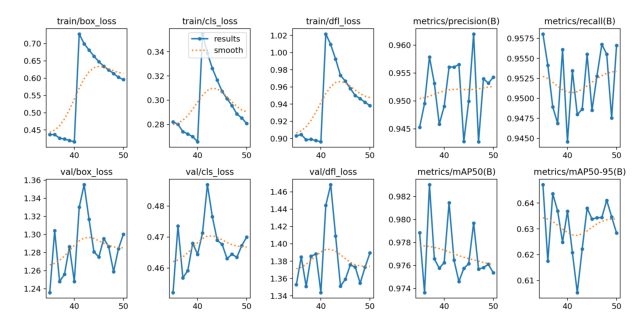

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image file
img = Image.open('/kaggle/working/runs/detect/train2/results.png')

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
# Export a YOLOv8n PyTorch model to TFLite format
# !yolo export model=/kaggle/working/runs/detect/train3/weights/last.pt format=tflite
from ultralytics import YOLO

model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
model.export(format='tflite')


In [30]:
# Open the image file
img = Image.open('/kaggle/running/yolov10/runs/detect/train7/confusion_matrix_normalized.png')

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/running/yolov10/runs/detect/train3/confusion_matrix_normalized.png'

In [12]:
!yolo task=detect mode=predict conf=0.5 save=True model=runs/detect/train2/weights/last.pt source=/kaggle/working/640-rotated-1-class/val/images
# !yolo task=detect mode=predict conf=0.1 save=True model=/content/best-150-palos-oclussion.pt source=/content/a0479bf2-0088-4fe4-8578-47bac7f774b7.jpg
# !yolo task=detect mode=predict conf=0.3 save=True model=/content/last_250_numbers.pt source=/content/5514952e-41ad-4efe-be19-154e626a2e3a.jpg

Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs

image 1/231 /kaggle/working/640-rotated-1-class/val/images/006ab679acd0b833b09b27bef5eff91f_180.png: 640x640 4 cards, 10.5ms
image 2/231 /kaggle/working/640-rotated-1-class/val/images/006ab679acd0b833b09b27bef5eff91f_270.png: 640x640 6 cards, 10.4ms
image 3/231 /kaggle/working/640-rotated-1-class/val/images/006ab679acd0b833b09b27bef5eff91f_90.png: 640x640 5 cards, 10.1ms
image 4/231 /kaggle/working/640-rotated-1-class/val/images/12351_max_eder_01_180.png: 640x640 6 cards, 10.3ms
image 5/231 /kaggle/working/640-rotated-1-class/val/images/12351_max_eder_01_270.png: 640x640 6 cards, 10.1ms
image 6/231 /kaggle/working/640-rotated-1-class/val/images/12351_max_eder_01_90.png: 640x640 6 cards, 9.6ms
image 7/231 /kaggle/working/640-rotated-1-class/val/images/12351_max_eder_02_180.png: 640x640 8 cards, 9.7ms
image 8/231 /

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmpojkwzd1i.PNG'


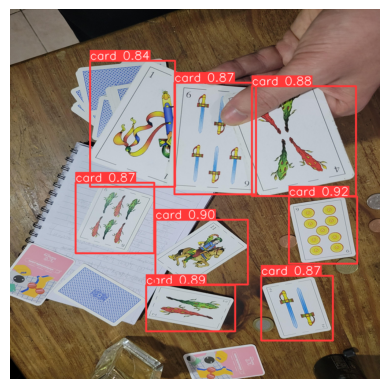

In [21]:
# import cv2
# image = cv2.imread("/kaggle/working/yolov10/runs/detect/predict/12351_max_eder_10.png")
# cv2.imshow('img',image)
from PIL import Image
import matplotlib.pyplot as plt

# Load an image
image = Image.open('/kaggle/working/yolov10/runs/detect/predict2/fc2048592466ef06ef6773242c1c11d3_90.png')

# Display the image using PIL
image.show()

# Alternatively, display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [13]:
!yolo export model=/kaggle/working/yolov10/runs/detect/train2/weights/last.pt format=tflite simplify

Ultralytics YOLOv8.1.34 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs

PyTorch: starting from '/kaggle/working/yolov10/runs/detect/train2/weights/last.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)
2024-08-03 18:40:16.793780: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 18:40:16.793842: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 18:40:16.795625: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirements [

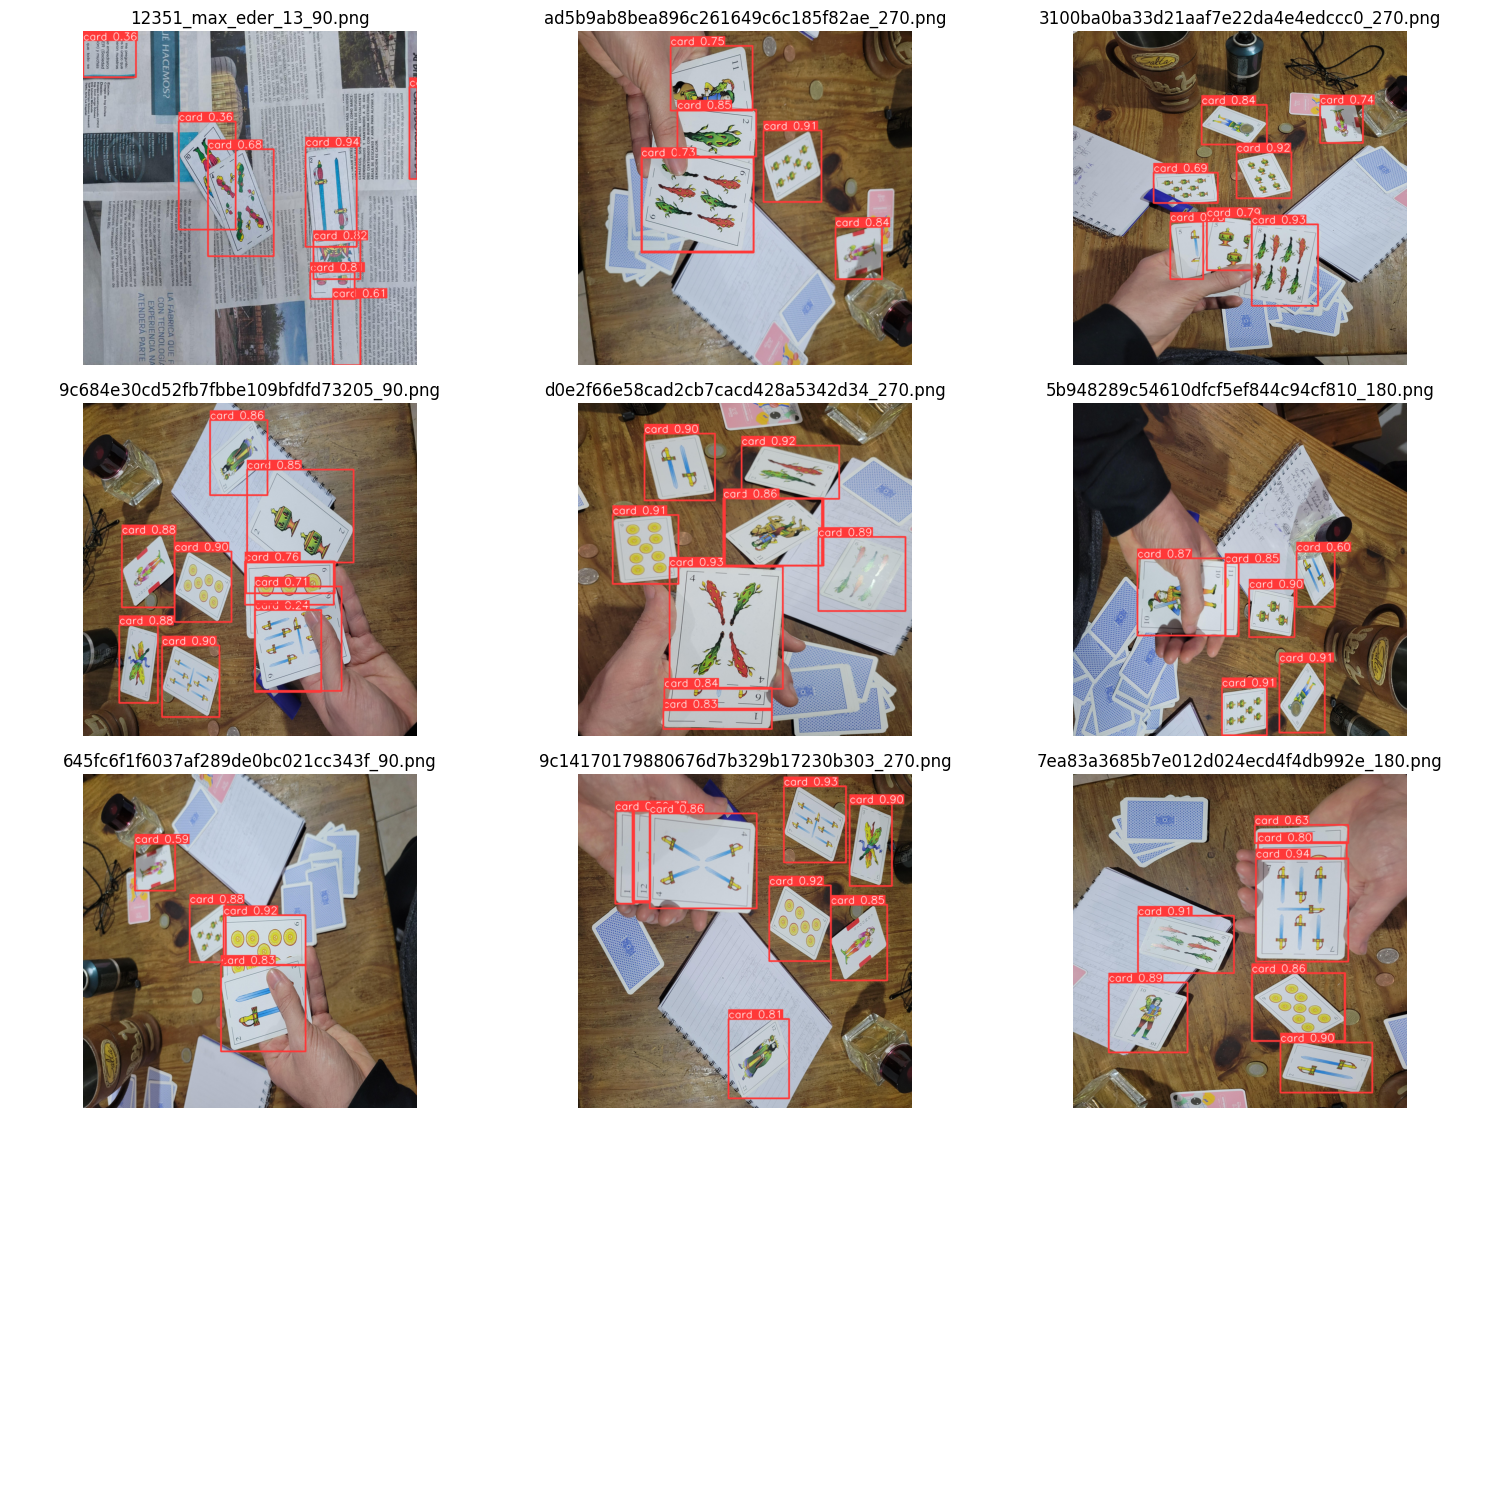

In [25]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to the directory containing the images
image_dir = '/kaggle/working/yolov10/runs/detect/predict2/'

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

# Number of images to display
num_images_to_display = 9

# Randomly select a subset of images
selected_images = random.sample(image_files, num_images_to_display)

# Define the number of images per row
images_per_row = 3

# Create a figure to display the images
fig, axes = plt.subplots(len(selected_images) // images_per_row + 1, images_per_row, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Display each selected image
for i, image_file in enumerate(selected_images):
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(image_file)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os

def count_files_in_directory(directory_path):
    return len([name for name in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, name))])

# Example usage
directory_path = '/content/YOLODataset/images/val'
file_count = count_files_in_directory(directory_path)
print(f'There are {file_count} files in the directory.')


There are 40 files in the directory.


In [13]:
from IPython.display import FileLink
FileLink(r'/kaggle/working/runs/detect/train/weights/best.pt')

/kaggle/working/runs/detect/train/weights/best.pt